<span style="color:orange; font-weight:bold">Importing Libraries.</span>

In [82]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

<span style="color:orange; font-weight:bold">Importing Hand Data.</span>

In [84]:
hand_Prashant = Image.open('Prashant.jpg')    ## My(Prashant) hand image
hand_Prashant = np.asarray(hand_Prashant)
hand_Prashant.shape

(1600, 1135, 3)

<span style="color:orange; font-weight:bold">Function to scan the pixels of the image and reduce the number of points.</span>

In [86]:
from collections import deque

def reducePoints(arr, max_coord):
    
    downsample_factor= 7
    # Convert arr to a set of tuples for O(1) lookups
    points_set = set(tuple(i) for i in arr)
    
    # Initialize the ordered list with the starting coordinate
    orderedArray = [tuple(max_coord)]
    
    # Use a deque to perform a BFS
    queue = deque([tuple(max_coord)])
    
    # Track visited points
    visited = set()
    visited.add(tuple(max_coord))
    
    # Track the number of points added
    count = 0
    
    while queue:
        start = queue.popleft()
        
        # List of all 8 possible neighborhood moves
        potential_moves = [
            (start[0]-1, start[1]), (start[0]+1, start[1]),
            (start[0], start[1]-1), (start[0], start[1]+1),
            (start[0]-1, start[1]-1), (start[0]-1, start[1]+1),
            (start[0]+1, start[1]-1), (start[0]+1, start[1]+1)
        ]
        
        for move in potential_moves:
            if move in points_set and move not in visited:
                count += 1
                if count % downsample_factor == 0:
                    orderedArray.append(move)
                queue.append(move)
                visited.add(move)
    
    return orderedArray


<span style="color:orange; font-weight:bold">Convert the RGB Image to Grayscale.</span>

In [88]:
height, width, _ = hand_Prashant.shape

hand_coords = []
for i in range(height):
        for j in range(width):
            r, g, b = hand_Prashant[i, j]
            hand_coo = (0.2989 * r + 0.5870 * g + 0.1140 * b)
            if hand_coo < 150:
                hand_coords.append((i,j))
hand_coords = np.asarray(hand_coords)

<span style="color:orange; font-weight:bold">Hand Cordinates array and Image.</span>

In [90]:
hand_coords

array([[  88,  542],
       [  88,  543],
       [  88,  544],
       ...,
       [1599,  537],
       [1599,  538],
       [1599,  539]])

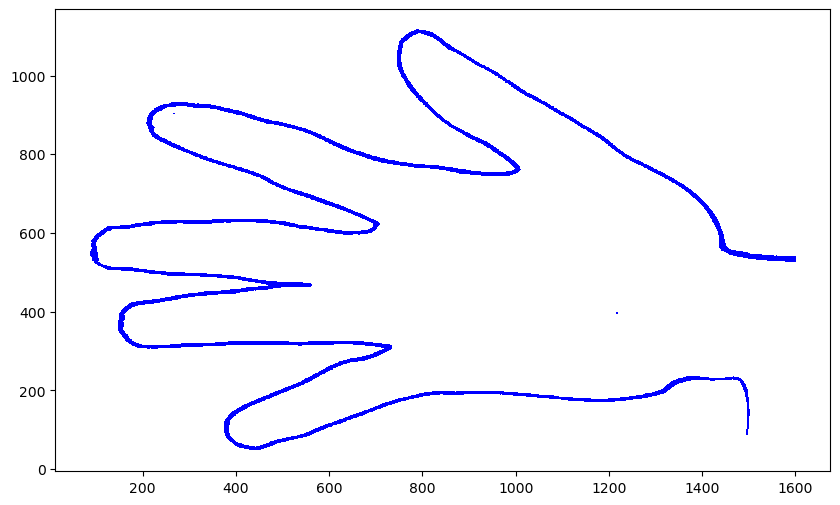

In [91]:
plt.figure(figsize=(10,6))
plt.plot(hand_coords[:,0], hand_coords[:,1],'b,')
plt.show()

<span style="color:orange; font-weight:bold">Finding max index of Image.</span>

In [93]:
max = 0
max_index = hand_coords[0]
for arr in hand_coords:
    dist = np.linalg.norm(arr)
    if (dist > max):
        max = dist
        max_index = arr

print(f"Edge point is {max_index}")

Edge point is [1599  539]


<span style="color:orange; font-weight:bold">Total number of points in hand_coords</span>

In [95]:
len(hand_coords)

54867

<span style="color:orange; font-weight:bold">New Hand_coords: Too many points. So we reduce it.</span>

In [97]:
new_hand_coords = reducePoints(hand_coords, list(max_index))
print(len(new_hand_coords))                             
new_hand_coords = np.asarray(new_hand_coords)

7836


<span style="color:orange; font-weight:bold">Print the image after reducing number of points.</span>

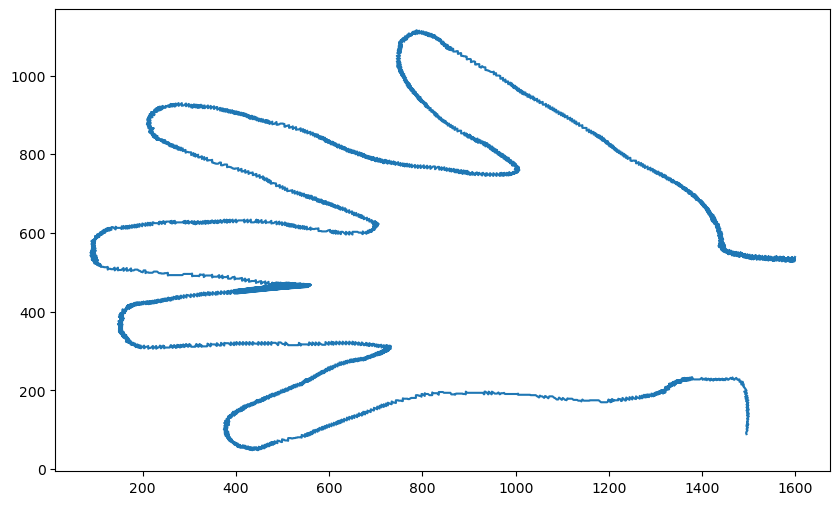

In [99]:
plt.figure(figsize=(10,6))
plt.plot(new_hand_coords[:,0], new_hand_coords[:,1])
plt.show()

<span style="color:orange; font-weight:bold">Function to get just the critical points in the image. This reduces the number of points further.</span>

In [101]:
def getCritical(arr, step, thresh):
    
    cript = [arr[0]]
    start = 0
    end = start + step
    
    while(end < len(arr)):
        
        t = False
        
        for i in range(start+1, end):
            if (getDist(arr[start], arr[end], arr[i]) > thresh):
                t = True
                cript.append(arr[i])
                start = i
                break
        
        if(not t):
            start += step
            end = start+step
        
    
    cript.append(arr[-1])
    return cript


def getDist(a, b, c):
    
    norm = np.linalg.norm
    
    A = np.array(a)
    B = np.array(b)
    C = np.array(c)
    
    return np.abs(norm(np.cross(B-A, A-C)))/norm(B-A)

In [102]:
critical_points = getCritical(new_hand_coords, 200, 8)
critical_points = np.asarray(critical_points)

In [103]:
len(critical_points)

122

<span style="color:orange; font-weight:bold">Printing the hand with just the critical points</span>

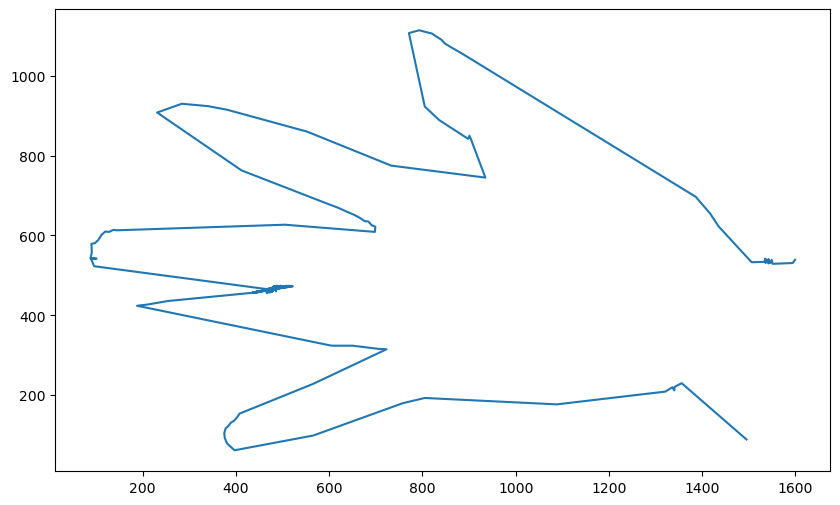

In [105]:
plt.figure(figsize=(10,6))
plt.plot(critical_points[:,0], critical_points[:,1])
plt.show()

In [106]:
hand_outline = critical_points

<span style="color:orange; font-weight:bold">Number of samples = 50</span>

In [108]:
m_v = np.reshape(hand_outline[1:], newshape=(len(hand_outline[1:])*2,1))

<span style="color:orange; font-weight:bold">Function to generate random vector</span>

In [110]:
def noisefn():
    noise = np.array([np.random.choice([-1,1,0.8,-0.8,-0.65,0.65,-0.35,0.35])*np.random.choice(20)/5 for i in range(len(m_v))])
    return np.reshape(noise, newshape=(m_v.shape[0],1))

In [111]:
m_v.shape

(242, 1)

<span style="color:orange; font-weight:bold">Creating 50 random hand vectors</span>

In [113]:
multiple_hand_vec = m_v.copy()

for i in range(49):
    vector = m_v + noisefn()
    multiple_hand_vec = np.append(multiple_hand_vec, vector, axis=1)

multiple_hand_vec.shape



(242, 50)

<span style="color:orange; font-weight:bold">Generating a mean hand shape</span>

In [115]:
mean_outline = np.reshape(np.average(multiple_hand_vec, axis=1), newshape=(multiple_hand_vec.shape[0],1))
mean_print = mean_outline.reshape(m_v.shape[0]//2,2)

<span style="color:orange; font-weight:bold">Plotting the mean shape</span>

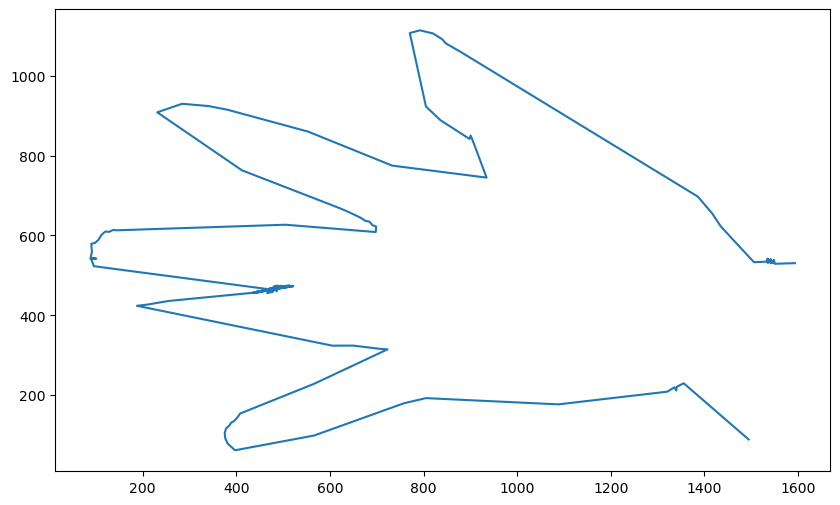

In [117]:
plt.figure(figsize=(10,6))
plt.plot(mean_print[:,0], mean_print[:,1])
plt.show()

<span style="color:orange; font-weight:bold">Generating the covariance matrix</span>

In [119]:
cov_matrix = np.cov(multiple_hand_vec)
cov_matrix.shape

(242, 242)

<span style="color:orange; font-weight:bold">Generating the Eigen Vectors and Eigen Values</span>

In [121]:
eigen_vals, eigen_vec = np.linalg.eigh(cov_matrix)
print(f"Total Eigen Values{eigen_vals.shape}, Total Eigen Vectors {eigen_vec.shape}")

Total Eigen Values(242,), Total Eigen Vectors (242, 242)


<span style="color:orange; font-weight:bold">Extracting only those Eigen Values that preserve 95% of the variance</span>

In [123]:
total_eigen = sum(eigen_vals)
i = 1
while(sum(eigen_vals[-i:]) < 0.95*total_eigen):
    i += 1
print(f"Total Eigen values kept {i} of {len(eigen_vals)}")

Total Eigen values kept 42 of 242


In [124]:
eigen_vec[-i:].shape

(42, 242)

<span style="color:orange; font-weight:bold">Generating Significant Eigen vectors and values</span>

In [126]:
sign_if_eigen_vectors  = np.reshape(eigen_vec[-i:], newshape=(m_v.shape[0],i))
sign_if_eigen_vals = np.reshape(eigen_vals[-i:], newshape=(i,1))
print(f"Eigen vectors {sign_if_eigen_vectors.shape}, Eigen Vals {sign_if_eigen_vals.shape}")

Eigen vectors (242, 42), Eigen Vals (42, 1)


<span style="color:orange; font-weight:bold">Taking 6 random scaling values and multiplying</span>

In [128]:
A = [3, 5, 9, -10, -8, -6]
shapes = []

for a in A:
    shape = mean_outline + np.matmul(sign_if_eigen_vectors, a*np.sqrt(sign_if_eigen_vals))
    shape = shape.reshape(m_v.shape[0]//2,2)
    shapes.append(shape)

<span style="color:orange; font-weight:bold">Plotting the Images</span>

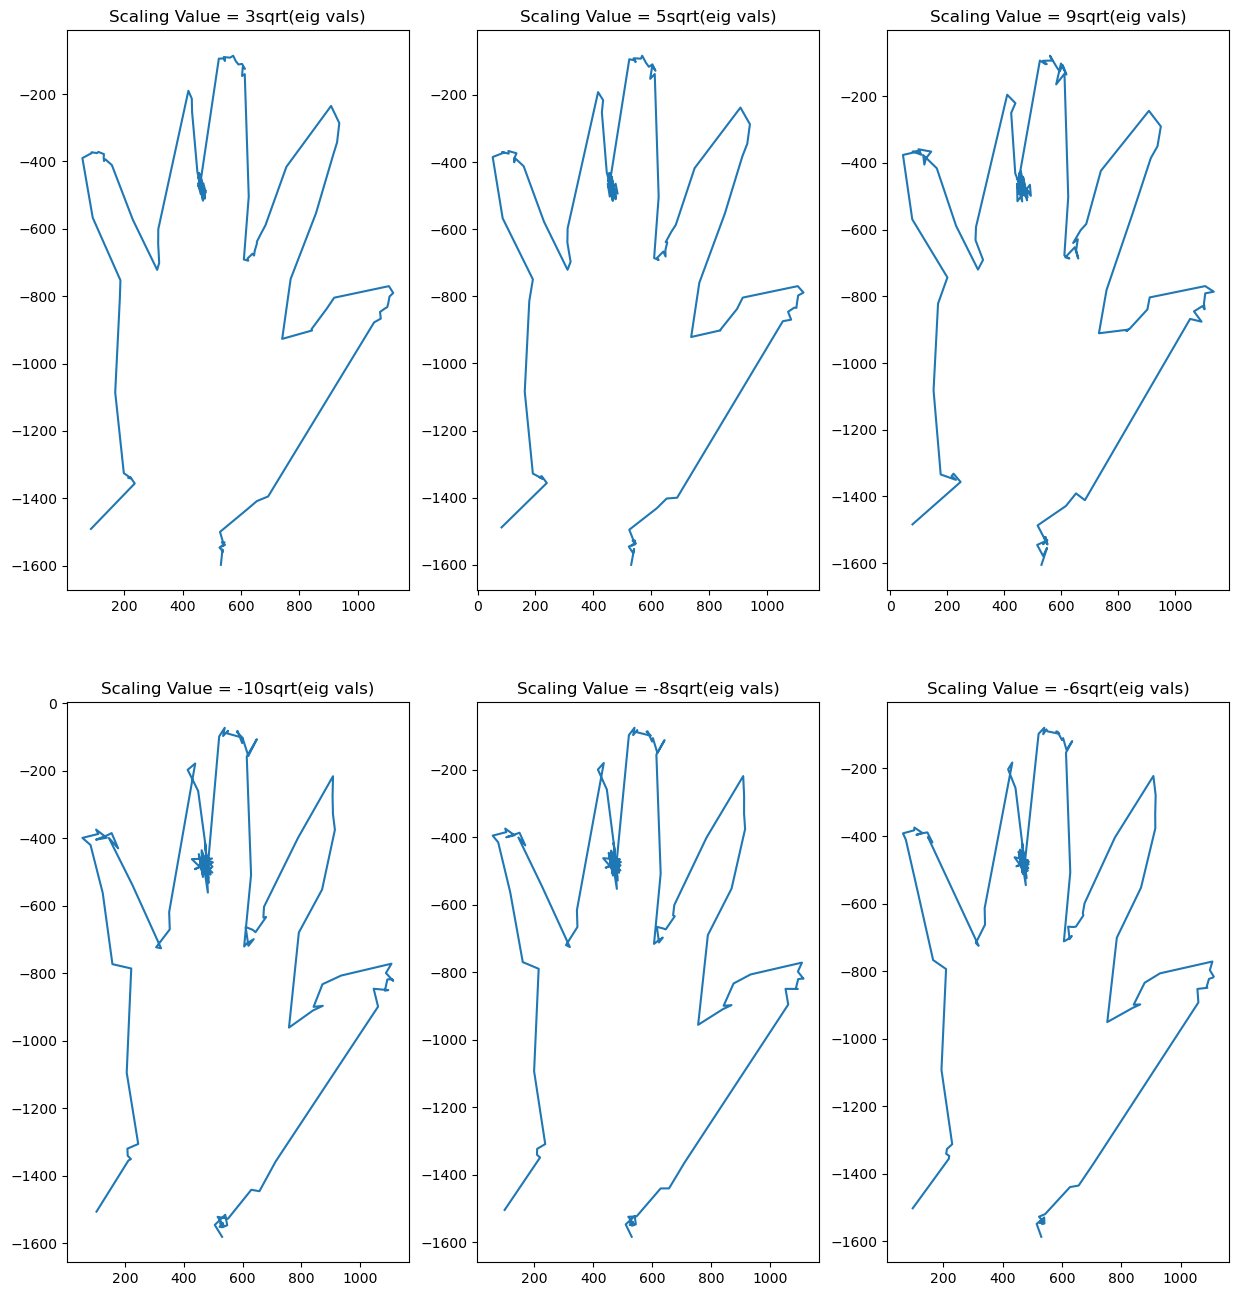

In [130]:
plt.figure(figsize=(15,16))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(shapes[i][:,1], -shapes[i][:,0])
    plt.title("Scaling Value = "+str(A[i])+"sqrt(eig vals)")